# Maladie Cardiaque : Exercie noté

## Importation des librairies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Chargement des données

In [8]:
Heart_Dataset = pd.read_csv("heart.dat", sep="\s+", names=["age", "sex", "chest_pain", "blood_pressure", "serum_cholestoral", "fasting_blood_sugar", "electrocardiographic", "max_heart_rate", "induced_angina", "oldpeak", "slope", "major vessels", "thal", "Label"])

In [9]:
Heart_Dataset.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,oldpeak,slope,major vessels,thal,Label
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


## Analyse statistique descriptive

### Profilage des donnees

In [6]:
Heart_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    float64
 1   sex                   270 non-null    float64
 2   chest_pain            270 non-null    float64
 3   blood_pressure        270 non-null    float64
 4   serum_cholestoral     270 non-null    float64
 5   fasting_blood_sugar   270 non-null    float64
 6   electrocardiographic  270 non-null    float64
 7   max_heart_rate        270 non-null    float64
 8   induced_angina        270 non-null    float64
 9   oldpeak               270 non-null    float64
 10  slope                 270 non-null    float64
 11  major vessels         270 non-null    float64
 12  thal                  270 non-null    float64
 13  Label                 270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


- On peut s'apercevoir que le jeu de donnees ne presente pas de valeurs nulles.

In [ ]:
Heart_Dataset.describe()

- Pour les colonnes age, blood_pressure, serum_cholestoral et max_heart_rate on note une dispersion assez elevee des donnees par rapport à la moyenne.
- Par rapport aux quartiles, la repartition des donnees est assez differentes selon les colonnes. En effet, pour les colonnes age, blood_pressure, serum_cholestoral, on note plus une repartition assez homogene des donnees sur q1, q2 et q3 avec une des proportions croissantes en passant de q1, q2 et q3. Pour d'autres colonnes comme max_heart_rate, la tendance de la repartition est differentes des colonnes citées ci-dessus.
- S'agissant de la moyenne, Il est notable de remarquer l'heterogeneité des echelles. En effet, la moyenne des colonnes du dataset sont tres differentes : Ceci peut etre problematique durant la phase d'apprentissage ; ainsi, un travail de normalisation sera fait pour contourner ce probleme

### Correlation des donnees

In [4]:
Heart_Dataset.corr()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,oldpeak,slope,major vessels,thal,Label
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest_pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
blood_pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum_cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fasting_blood_sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
electrocardiographic,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max_heart_rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
induced_angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


- Les colonnes ont des correlations souvent tres faibles entre elles. Ceci teimoigne d'une absence de redondance d'informations tres probable sur l'ensemble de donnees. 

### Data visualisation

#### Analyse univariée

1    150
2    120
Name: Label, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Label'>

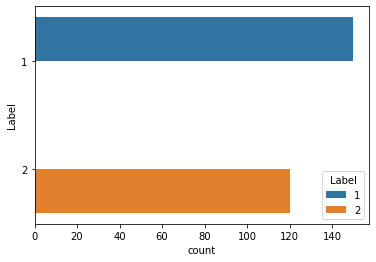

In [10]:
print(Heart_Dataset.Label.value_counts())
sns.countplot(y="Label", hue="Label", data=Heart_Dataset)

- On constate que l'absence maladie est plus importante que la presence de donnees dans l'ensemble de donnees

1.0    183
0.0     87
Name: sex, dtype: int64


<AxesSubplot:xlabel='count', ylabel='sex'>

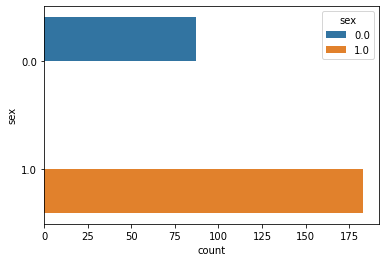

In [11]:
print(Heart_Dataset.sex.value_counts())
sns.countplot(y="sex", hue="sex", data=Heart_Dataset)

- Ce graphe montre que la proportion de sex maculin est plus important que celle de sex feminin

4.0    129
3.0     79
2.0     42
1.0     20
Name: chest_pain, dtype: int64


<AxesSubplot:xlabel='chest_pain', ylabel='count'>

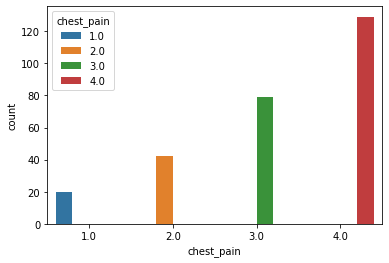

In [12]:
print(Heart_Dataset.chest_pain.value_counts())
sns.countplot(x="chest_pain", hue="chest_pain", data=Heart_Dataset)

- Les douleurs thoraciques de niveau 4 sont tres representees dans l'ensemble de donnees. Elles sont suvie par le niveau 3, ensuite par le niveau 2 et 1 en suivant la meme ordre.

2.0    137
0.0    131
1.0      2
Name: electrocardiographic, dtype: int64


<AxesSubplot:xlabel='count', ylabel='electrocardiographic'>

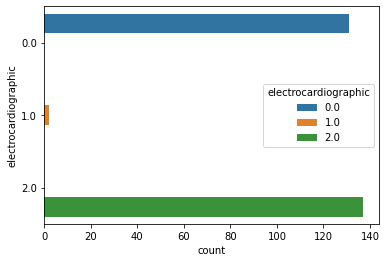

In [13]:
print(Heart_Dataset.electrocardiographic.value_counts())
sns.countplot(y="electrocardiographic", hue="electrocardiographic", data=Heart_Dataset)

3.0    152
7.0    104
6.0     14
Name: thal, dtype: int64


<AxesSubplot:xlabel='count', ylabel='thal'>

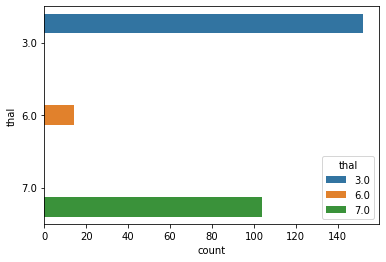

In [14]:
print(Heart_Dataset.thal.value_counts())
sns.countplot(y="thal", hue="thal", data=Heart_Dataset)

In [ ]:
sns.distplot(Heart_Dataset.age, rug=True, hist=True)

- La plus part des patient ont un age compris entre 40 - 70 annees. Les personnes qui pourraient etre atteintes par la maladie seraient tres probablement d'une age avancé

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_heart_rate', ylabel='Density'>

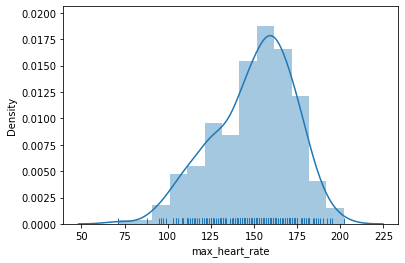

In [15]:
sns.distplot(Heart_Dataset.max_heart_rate, rug=True, hist=True)

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='blood_pressure', ylabel='Density'>

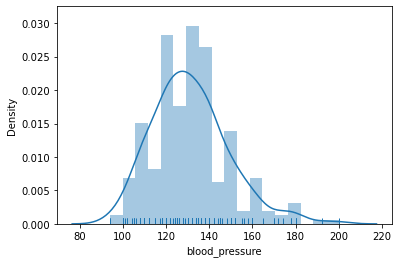

In [16]:
sns.distplot(Heart_Dataset.blood_pressure, rug=True, hist=True)

In [ ]:
sns.distplot(Heart_Dataset.serum_cholestoral, rug=True, hist=True)

#### Analyse bivariée

<AxesSubplot:xlabel='Label', ylabel='age'>

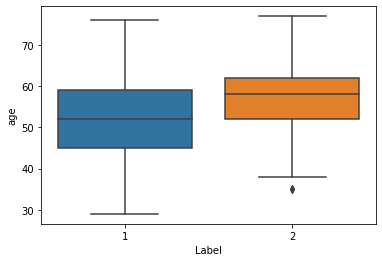

In [17]:
sns.boxplot(x='Label',y='age', data=Heart_Dataset)

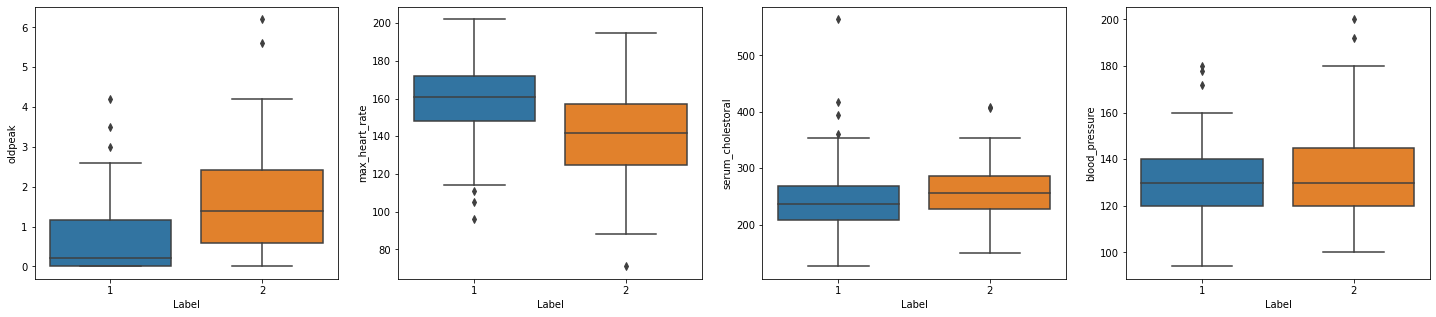

In [18]:
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Label',y='oldpeak', data=Heart_Dataset)
plt.subplot(1,4,2)
sns.boxplot(x='Label',y='max_heart_rate', data=Heart_Dataset)
plt.subplot(1,4,3)
sns.boxplot(x='Label',y='serum_cholestoral', data=Heart_Dataset)
plt.subplot(1,4,4)
sns.boxplot(x='Label',y='blood_pressure', data=Heart_Dataset);

- On voit que la plus des variables presente des valeurs aberrentes. 

In [ ]:
# Répartition graphique des exemples en fonction de toutes les combinaisons de variables 2 à 2
sns.pairplot(Heart_Dataset, hue='Label', corner = True, palette = ['orange', 'blue'], height=4)

## Apprentissage du modele predictif

### Entrainement du modèle de prediction

#### Strategie 1 : ensemble d’apprentissage, de validation et de test 

In [4]:
X = Heart_Dataset.drop('Label', axis=1)
Y = Heart_Dataset['Label']

In [ ]:
# Division des donnees en sous ensemble d'entrainement, de validation et de test

In [5]:
X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.2)

In [6]:
X_a, X_v, Y_a, Y_v = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Normalisation des donnees

In [7]:
scaler = StandardScaler()
X_a_scalled = scaler.fit(X_a)
X_a_scalled = scaler.transform(X_a)

In [ ]:
X_v_scalled = scaler.transform(X_v)

In [8]:
p_k = [1, 5, 10, 15, 20, 25]

eval_err = {
    "apprentissage": [],
    "validation": []
}

models = {}

In [9]:
for k in p_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_a, Y_a)
    eval_err["apprentissage"].append(1 - model.score(X_a, Y_a))
    
    Y_v_pred = model.predict(X_v)
    eval_err["validation"].append(1 - accuracy_score(Y_v, Y_v_pred))
    models[k]=model

In [ ]:
eval_err

In [ ]:
plt.figure()
plt.plot(p_k, eval_err["apprentissage"])
plt.plot(p_k, eval_err["validation"])

In [ ]:
# D'apres le graphe, nous pouvons constater que l'erreur de validation est plus petite pour la valeur de k=15.
# Ainsi, pour cette valeur, le modele de prediction generalise mieux sur l'ensemble de validation.
# De ce fait, nous avons comme modele optimal, le modele avec comme hyperparamettre k=15. 

In [10]:
best_model = models[15]

In [ ]:
# Normalisation des X_t

In [11]:
X_t_scalled = scaler.transform(X_t)

In [12]:
Y_t_pred = best_model.predict(X_t_scalled)

In [13]:
accuracy_score(Y_t, Y_t_pred)

0.4444444444444444

In [14]:
print(classification_report(Y_t, Y_t_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.44      1.00      0.62        24

    accuracy                           0.44        54
   macro avg       0.22      0.50      0.31        54
weighted avg       0.20      0.44      0.27        54



C:\Users\cheri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Ce modele presente des resultats pas satisfaisants. En effet, nous pouvons noter une precision nulle
## sur la classe 1 (presence de maladie). De plus, cette metrique n'est pas tres elevee pour la classe 2
## (absence de maladie). Ceci peut etre expliquer par le fait que le modele ne generalise pas bien les donnees
## test et par consequent il fait bcp d'erreurs dans ses predictions.
## Pour resoudre ce probleme, nous allons experimenter une nouvelle strategie d'apprentissage du modele predictif.

#### Strategie 2 : validation-croisée pour la sélection de k

In [15]:
param_grid = {'n_neighbors': p_k,
             'metric' : ['euclidean', 'manhattan']}

In [16]:
clf = GridSearchCV(
    KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring='accuracy'   # score à optimiser
)

In [17]:
clf.fit(X_a_scalled, Y_a)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [1]:
clf.best_params_

NameError: name 'clf' is not defined

In [18]:
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        'accuracy',
        mean,
        std*2,
        params
    ) )

accuracy = 0.750 (+/-0.117) for {'metric': 'euclidean', 'n_neighbors': 1}
accuracy = 0.820 (+/-0.112) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.834 (+/-0.097) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.838 (+/-0.103) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.829 (+/-0.131) for {'metric': 'euclidean', 'n_neighbors': 20}
accuracy = 0.838 (+/-0.103) for {'metric': 'euclidean', 'n_neighbors': 25}
accuracy = 0.732 (+/-0.163) for {'metric': 'manhattan', 'n_neighbors': 1}
accuracy = 0.801 (+/-0.138) for {'metric': 'manhattan', 'n_neighbors': 5}
accuracy = 0.811 (+/-0.108) for {'metric': 'manhattan', 'n_neighbors': 10}
accuracy = 0.829 (+/-0.112) for {'metric': 'manhattan', 'n_neighbors': 15}
accuracy = 0.829 (+/-0.138) for {'metric': 'manhattan', 'n_neighbors': 20}
accuracy = 0.820 (+/-0.173) for {'metric': 'manhattan', 'n_neighbors': 25}


In [19]:
new_best_model = clf.best_estimator_

In [20]:
New_Y_t_pred = new_best_model.predict(X_t_scalled)

In [21]:
print(classification_report(Y_t, New_Y_t_pred))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
## Cette nouvelle strategie presente des resultats bien meilleurs que la precedente. En effet, les performances
## du modele sur le jeu de donnees test donne des resultats plus satisfaisants sur la precision, le rappel et
## f1-score. Ce qui teimoigne d'une capacite de generalisation que le modele a.

#### Prise en compte de la matrice de cout

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

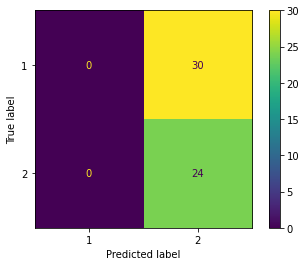

In [23]:
plot_confusion_matrix(best_model, X_t_scalled, Y_t)

In [25]:
conf_matrix = confusion_matrix(Y_t, New_Y_t_pred)

In [26]:
conf_matrix

array([[29,  1],
       [ 4, 20]], dtype=int64)

In [ ]:
new_matrix_conf = [[conf_matrix[0][0], conf_matrix[0][1]],[5*conf_matrix[1][0], conf_matrix[1][1]]]

In [ ]:
new_matrix_conf

In [ ]:
precision = ((new_matrix_conf[0][0])/(new_matrix_conf[0][0]+new_matrix_conf[1][1]))

In [ ]:
precision

In [ ]:
recall = ((new_matrix_conf[0][0])/(new_matrix_conf[0][0]+new_matrix_conf[1][0]))

In [ ]:
recall

In [ ]:
taux_erreur_classique = ((new_matrix_conf[0][1]+new_matrix_conf[1][0])/(new_matrix_conf[0][0]+new_matrix_conf[0][1]+new_matrix_conf[1][0]+new_matrix_conf[1][1]))

In [ ]:
taux_erreur_classique

In [ ]:
## En tenant compte de la remarque faite sur la matrice de cout, nous pouvons constaté que les mesures
## faites dans la strategie 2 s'averent fausses. En effet, les nouvelles mesures faite en calculant la nouvelle
## de confusion, montre que les resultats de la strategie 2 ne sont pas en realite fameux.